In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json

sns.set_theme(style='whitegrid', palette='pastel')

# Sentiment

Positive, Neutral and Negative sentiment overall and across different topics.

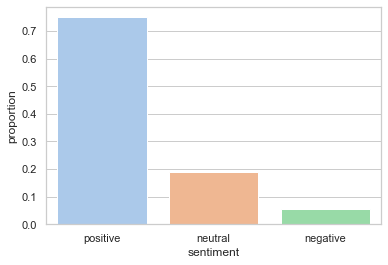

In [63]:
stats_path = '../test_stats.json'

with open(stats_path, 'r') as f:
    data = json.load(f)

overall = data['overall']

sentiments_names = {
    'p': 'positive',
    'o': 'neutral',
    'n': 'negative'
}

sentiments = pd.DataFrame({
    'sentiment': [sentiments_names[k] for k in overall['sentiments'].keys()],
    'proportion': [v/1000 for v in overall['sentiments'].values()]
})

ax = sns.barplot(x='sentiment', y='proportion', data=sentiments)


In [65]:
by_topic = data['by_topic']

topics_names = {
    'rev': 'review',
    'act': 'acting',
    'media': 'media',
    'not_watched': 'not watched',
    'sce': 'scene',
    'ad': 'advertisement',
    'ten': 'tennis'
}

by_topic_values = []
for t in topics_names:
    total = sum(by_topic[t].values())
    if len(by_topic[t].values())==3:
        by_topic_values.extend([v/total for v in by_topic[t].values()])
    else:
        for k in sentiments_names.keys():
            by_topic_values.append(by_topic[t].get(k, 0)/total)

sentiments_by_topic = pd.DataFrame({
    'topic': [topics_names[k] for k in by_topic.keys() for _ in range(3)],
    'sentiment': [sentiments_names[v] for _ in range(7) for v in by_topic['rev'].keys() ],
    'proportion': by_topic_values
})

sentiments_by_topic

,topic,sentiment,proportion
0,review,positive,0.854772
1,review,neutral,0.097510
2,review,negative,0.047718
3,acting,positive,0.880000
4,acting,neutral,0.102857
5,acting,negative,0.017143
6,media,positive,0.481707
7,media,neutral,0.390244
8,media,negative,0.128049
9,not watched,positive,0.661972


[Text(0.5, 0, 'proportion within each topic')]

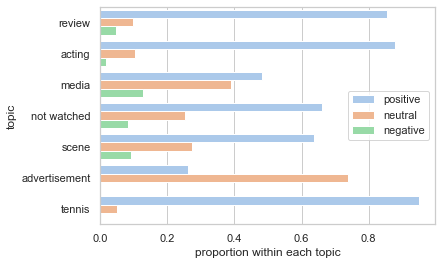

In [78]:
ax = sns.barplot(x='proportion', y='topic', hue='sentiment', data=sentiments_by_topic)
ax.legend(loc=7, frameon=True)
ax.set(xlabel='proportion within each topic')

King Richard gets high praise in general and in acting. It receives the most negative sentiment though media, with 12.8% of all media tweets being negative.

# Topics

Distribution of topics 

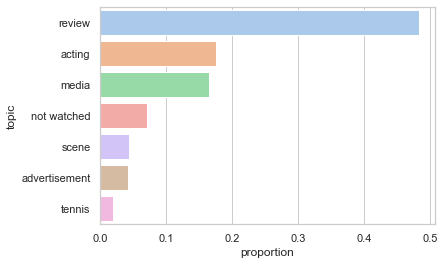

In [81]:
overall_topics = pd.DataFrame({
    'topic': [topics_names[k] for k in overall['topics'].keys()],
    'proportion': [v/1000 for v in overall['topics'].values()]
})

ax = sns.barplot(x='proportion', y='topic', data=overall_topics)

The reviews make up nearly half of the entire dataset. This category was most likely inflated from the short, generic tweets about King Richard such as "I liked King Richard!" with no other explanation.

# TF-IDF scores

Ranked for each topic.

In [133]:
tf_idf_data_path = '../test_tf_idf.json'

with open(tf_idf_data_path, 'r') as f:
    tf_idf_data = json.load(f)

df_data = {
    'topic': [topics_names[k] for k in tf_idf_data.keys()],
    'words': [[w[0] for w in sorted(v.items(), key=lambda x: x[1], reverse=True)[:10]] for v in tf_idf_data.values()]
}

df_topics = pd.DataFrame(df_data)
df_topics

,topic,words
0,acting,"[best, smith, actor, supporting, actress, aunj..."
1,advertisement,"[pg13, amp, tickets, max, fri, ghostbusters, a..."
2,media,"[10, tick, live, top, dad, williams, dune, ser..."
3,not watched,"[watch, see, tonight, go, na, im, wan, watchin..."
4,review,"[movie, good, story, great, kingrichard, film,..."
5,scene,"[strongest, dangerous, creature, knows, got, k..."
6,tennis,"[tennis, im, want, watching, learnt, court, st..."


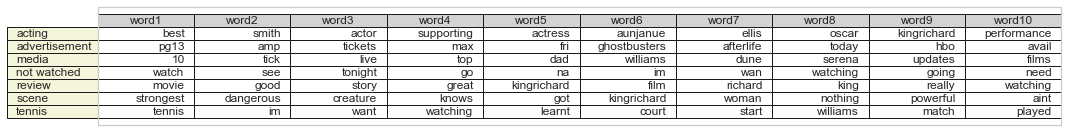

In [134]:
fig, ax = plt.subplots(figsize=(15, 2))

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
fig.patch.set_visible(False)

ax.table(
    cellText=df_topics['words'],
    rowLabels=df_topics['topic'],
    colLabels=[f'word{i+1}' for i in range(10)],
    colColours=np.full(10, 'lightgray'),
    rowColours=np.full(7, 'beige'),
    loc='center')
fig.tight_layout()

Don't use this table for the actual report, writing the table directly with Latex is better.

In [12]:
df = pd.read_csv('../test_tweets_cleaned.csv')

df

,text,url,keep,topics,sentiments,topics2,sentiments2
0,venus and serena williams both signed off on w...,https://twitter.com/i/web/status/1466919486766...,1,act,p,NaN,NaN
1,venus williams speaks on will smiths role in k...,https://twitter.com/i/web/status/1466919309565...,1,act,o,NaN,NaN
2,venus williams speaks on will smiths role in k...,https://twitter.com/i/web/status/1466918858778...,1,act,o,NaN,NaN
3,if will smith wins the oscar for king richard ...,https://twitter.com/i/web/status/1466918619913...,1,act,p,NaN,NaN
4,venus williams talks about will smiths role in...,https://twitter.com/i/web/status/1466917861004...,1,act,p,NaN,NaN
...,...,...,...,...,...,...,...
995,finally got around to watching kingrichard la...,https://twitter.com/i/web/status/1468625558473...,1,rev,p,NaN,NaN
996,king richard is a fucking class film by the way,https://twitter.com/i/web/status/1468625064232...,1,rev,p,NaN,NaN
997,tomorrow 129 its your last chance to see king ...,https://twitter.com/i/web/status/1468624701111...,1,ad,p,NaN,NaN
998,king richard an unusual sports biopic with wi...,https://twitter.com/i/web/status/1468624700561...,1,rev,o,NaN,NaN


In [13]:
(df.groupby('topics')['text']
.apply(lambda x: x.str.split().str.len().mean())
.reset_index(name='mean_len'))

,topics,mean_len
0,act,22.262857
1,ad,29.476190
2,media,21.915152
3,not_watched,13.985915
4,rev,15.790890
5,sce,20.795455
6,ten,23.450000


In [14]:
df['len'] = df['text'].str.split().str.len()
df

,text,url,keep,topics,sentiments,topics2,sentiments2,len
0,venus and serena williams both signed off on w...,https://twitter.com/i/web/status/1466919486766...,1,act,p,NaN,NaN,17
1,venus williams speaks on will smiths role in k...,https://twitter.com/i/web/status/1466919309565...,1,act,o,NaN,NaN,10
2,venus williams speaks on will smiths role in k...,https://twitter.com/i/web/status/1466918858778...,1,act,o,NaN,NaN,10
3,if will smith wins the oscar for king richard ...,https://twitter.com/i/web/status/1466918619913...,1,act,p,NaN,NaN,32
4,venus williams talks about will smiths role in...,https://twitter.com/i/web/status/1466917861004...,1,act,p,NaN,NaN,10
...,...,...,...,...,...,...,...,...
995,finally got around to watching kingrichard la...,https://twitter.com/i/web/status/1468625558473...,1,rev,p,NaN,NaN,33
996,king richard is a fucking class film by the way,https://twitter.com/i/web/status/1468625064232...,1,rev,p,NaN,NaN,10
997,tomorrow 129 its your last chance to see king ...,https://twitter.com/i/web/status/1468624701111...,1,ad,p,NaN,NaN,32
998,king richard an unusual sports biopic with wi...,https://twitter.com/i/web/status/1468624700561...,1,rev,o,NaN,NaN,9


0            acting
1            acting
2            acting
3            acting
4            acting
           ...     
995          review
996          review
997    advertisment
998          review
999          review
Name: topics, Length: 1000, dtype: category
Categories (7, object): ['acting', 'advertisment', 'media', 'not_watched', 'review', 'scene', 'tennis']


[Text(0.5, 0, 'Length of tweet (words)'), Text(0, 0.5, 'Topics')]

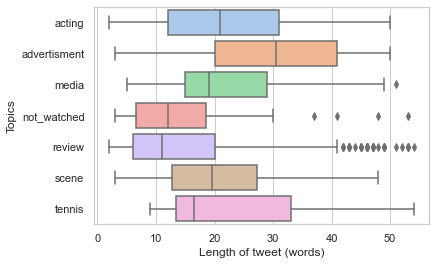

In [17]:
df['topics'] = df['topics'].astype('category').cat.rename_categories(['acting', 'advertisment', 'media', 'not_watched', 'review', 'scene', 'tennis'])
print(df['topics'])
ax = sns.boxplot(x='len', y='topics', data=df)
ax.set(xlabel='Length of tweet (words)', ylabel='Topics')